In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.precision = 1  # 桁数表示コントロール

import warnings
warnings.filterwarnings('ignore')

# データ準備

In [47]:
# データ保存ディレクトリへ移動
ls = os.getcwd().split('\\')
ls[-1] = 'data'
lsr=""
for i in ls:
    lsr += i+'\\'

# ディレクトリ移動
os.chdir(lsr)

In [48]:
raw_df = pd.read_csv('./datasets/Popular_Spotify_Songs.csv', encoding = 'latin-1')
raw_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [49]:
# データの形状を確認
raw_df.shape

(953, 24)

In [50]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [51]:
raw_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0
mean,1.6,2018.2,6.0,13.9,5200.1,12.0,67.8,51.9,2.7,122.5,67.0,51.4,64.3,27.1,1.6,18.2,10.1
std,0.9,11.1,3.6,9.2,7897.6,19.6,86.4,50.6,6.0,28.1,14.6,23.5,16.6,26.0,8.4,13.7,9.9
min,1.0,1930.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,65.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0
25%,1.0,2020.0,3.0,6.0,875.0,0.0,13.0,7.0,0.0,100.0,57.0,32.0,53.0,6.0,0.0,10.0,4.0
50%,1.0,2022.0,6.0,13.0,2224.0,3.0,34.0,38.0,0.0,121.0,69.0,51.0,66.0,18.0,0.0,12.0,6.0
75%,2.0,2022.0,9.0,22.0,5542.0,16.0,88.0,87.0,2.0,140.0,78.0,70.0,77.0,43.0,0.0,24.0,11.0
max,8.0,2023.0,12.0,31.0,52898.0,147.0,672.0,275.0,58.0,206.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0


In [52]:
mask = raw_df['streams'].str.isnumeric()

'''
.str.isnumeric()は文字列メソッドで、データフレームの各行の'streams'列の値が数値で
構成されている文字列かどうかを判断します。結果はブール値のSeriesオブジェクトとして返されます。
'''

# ~mask は mask の値を反転させた新しいブール値のSeriesを作成して抽出に利用
raw_df.loc[~mask]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [53]:
print("before", raw_df.shape)

raw_df = raw_df.loc[mask]
print("after", raw_df.shape)

# 整数型に変換
raw_df.streams = raw_df.streams.astype('int64')

before (953, 24)
after (952, 24)


In [54]:
df = raw_df.copy()

In [55]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [56]:
# 確認
df['artist(s)_name'].unique()[:10]

array(['Latto, Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave, Central Cee',
       'Eslabon Armado, Peso Pluma', 'Quevedo', 'Gunna',
       'Peso Pluma, Yng Lvcas'], dtype=object)

In [57]:
# 確認
'J. Cole' in (df['artist(s)_name'].values)

True

df['artist(s)_name'].values　と　df['artist(s)_name']　の違いは以下。

- df['artist(s)_name']  
これはPandasのDataFrameから'artist(s)_name'という列を選択します。  
結果はPandasの Series オブジェクトになります。  
SeriesオブジェクトにはDataFrameのインデックスが保持されています。

- df['artist(s)_name'].values  
.valuesを付けることで、SeriesオブジェクトからNumPy配列に変換されます。  
結果はNumPy 1次元配列 になります。  
NumPy配列にはインデックスがなく、単なる値のリストになります。

In [58]:
# 整形
temp = df['artist(s)_name'].str.split(',').str[0]

df['artist(s)_name'] = temp
df.rename(columns={'artist(s)_name':'artist'}, inplace=True)

df['artist'].head()

0             Latto
1       Myke Towers
2    Olivia Rodrigo
3      Taylor Swift
4         Bad Bunny
Name: artist, dtype: object

In [59]:
temp = pd.DataFrame({'year':df.released_year, 'month':df.released_month, 'day':df.released_day})

# pd.to_datetime(temp): tempを年月日を組み合わせた日付データに変換
# .dt.day_name(): pd.to_datetimeで得られた日付データから、曜日の名前を文字列で抽出します
temp = pd.to_datetime(temp).dt.day_name()

df.released_day = temp
df.head()

,track_name,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,Friday,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,Thursday,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,Friday,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,Friday,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,Thursday,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Exploratory Data Analysis (EDA)

## No. of Unique Artist

In [60]:
len(df['artist'].unique())

458

In [61]:
df['artist'].unique().shape[0]

458

In [62]:
df['artist'].nunique()

458

Their are total 458 unique artist in the dataset.

## Number of Songs released (1980-2022)

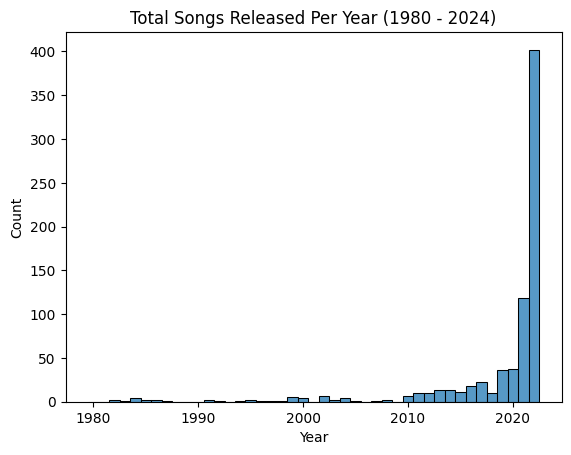

In [63]:
ax = sns.histplot(df['released_year'], binrange=(1980, 2022), discrete=True)
ax.set(xlabel='Year', ylabel='Count')
ax.set_title('Total Songs Released Per Year (1980 - 2024)')
plt.show()

Most of the songs in dataset were released in year 2022

## Trend of Song Release Month

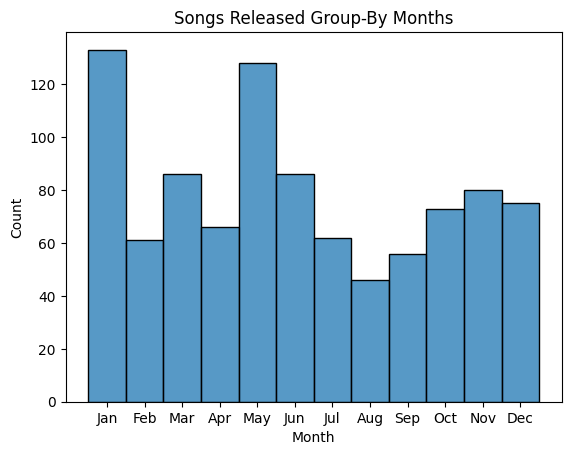

In [64]:
ax = sns.histplot(df['released_month'], discrete=True) # discrete=Trueを指定することで、離散型のヒストグラム(棒グラフのようなもの)を描画
ax.set(xlabel='Month', ylabel='Count')
ax.set_title('Songs Released Group-By Months')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

January saw the most released of the songs followed by May. August witness least song release.

## Trend of Song release Day

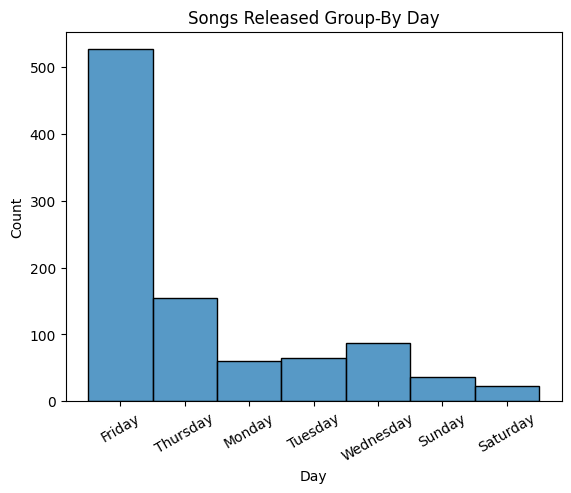

In [65]:
ax = sns.histplot(df['released_day'])
ax.set(xlabel='Day', ylabel='Count')
ax.set_title('Songs Released Group-By Day')
plt.xticks(rotation = 30)
plt.show()

Most of the songs were released on Friday.  
This can be because people are more likely to stream music on weekends when they are free.

## Top 10 Artist with most song released

temp = df.artist.value_counts().to_frame().head(10).iloc[:, 0]

- df.artist.value_counts()で、アーティスト名の出現回数(曲の数)を計算  
- .to_frame()で、SeriesをDataFrameに変換  
- .head(10)で、上位10件を取得  
- .iloc[:, 0]で、DataFrameの最初の列(アーティスト名)を抽出し、tempに代入


temp_df = pd.DataFrame({'artist':temp.index, 'count':temp})

- アーティスト名とその曲数を列に持つ新しいDataFrame temp_dfを作成

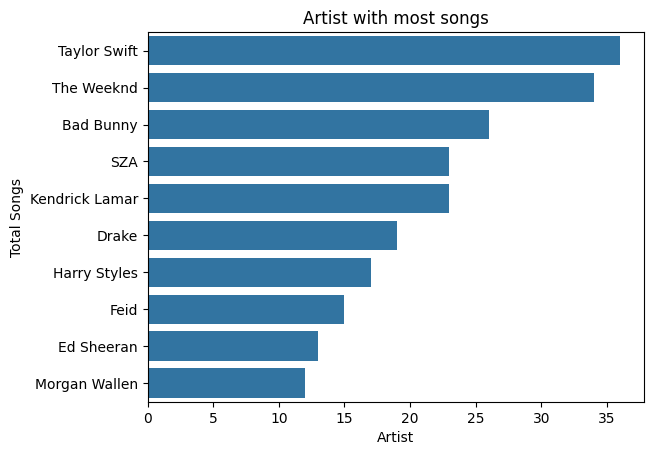

In [66]:
temp = df.artist.value_counts().to_frame().head(10).iloc[:, 0]
temp_df = pd.DataFrame({'artist':temp.index, 'count':temp})

ax = sns.barplot(temp_df, y = 'artist', x = 'count')
ax.set(xlabel='Artist', ylabel='Total Songs')
ax.set_title('Artist with most songs')

plt.show()

Taylor Swift have the most songs released, followed by The Weeknd and Spanish Singer Bad Bunny.

## Beats Per Minute (BPM)

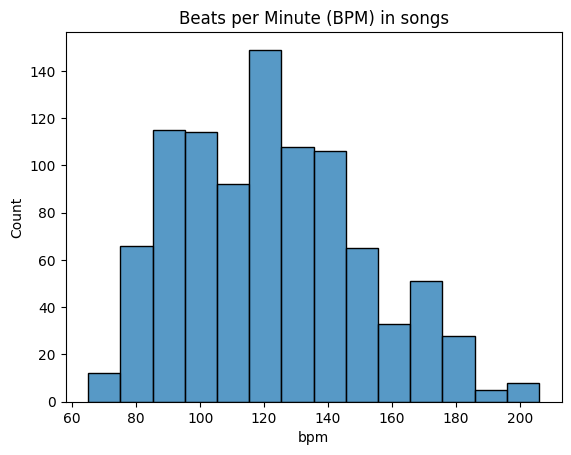

In [67]:
ax = sns.histplot(df, x='bpm', bins=14)
ax.set_title('Beats per Minute (BPM) in songs')
plt.show()

120 BPM was the artist favourite. While 90,100,130 and 140 have equal preference among others.

## Top 10 songs according to their number in Playlist, Chart and Total Stream

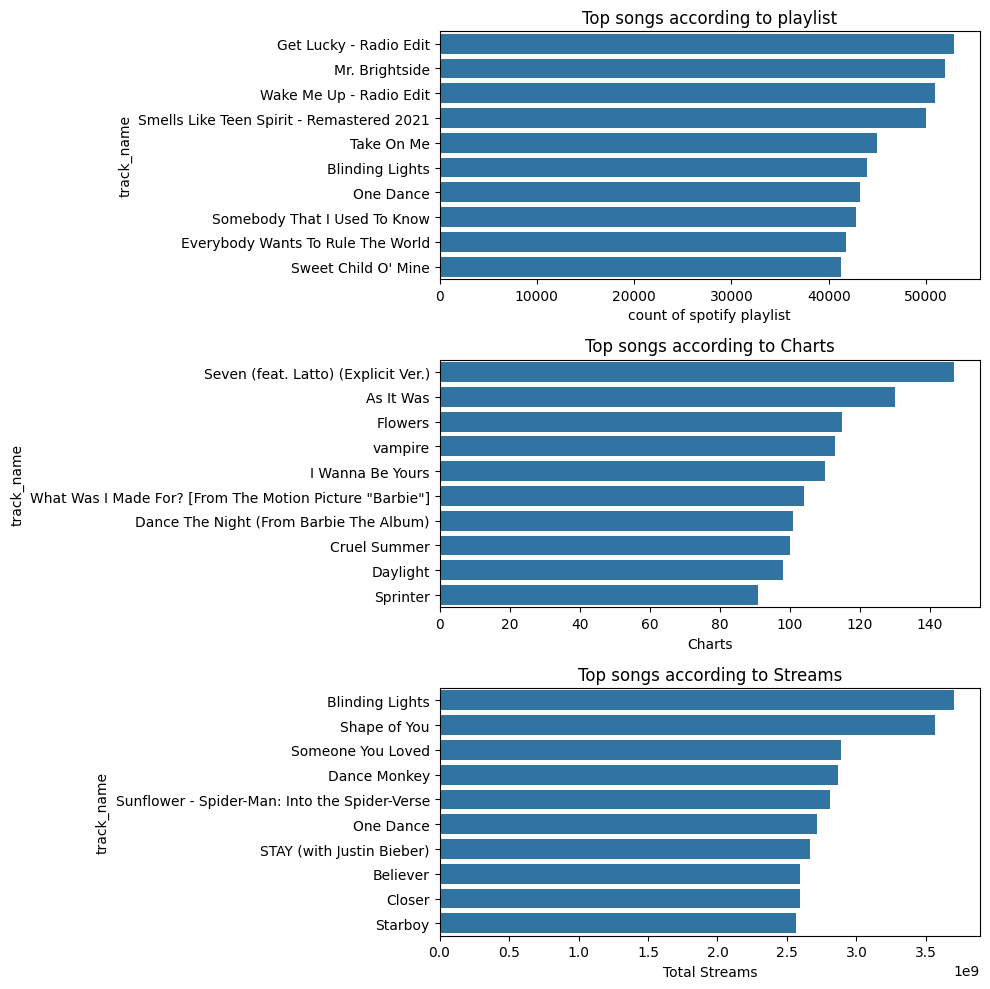

In [68]:
play = df.sort_values(by='in_spotify_playlists', ascending=False)
play = play[['track_name', 'in_spotify_playlists']][:10]

chart = df.sort_values(by='in_spotify_charts', ascending=False)
chart = chart[['track_name', 'in_spotify_charts']][:10]

stream = df.sort_values(by='streams', ascending=False)
stream = stream[['track_name', 'streams']][:10]

fig, axes = plt.subplots(3,1,figsize=(10,10))
plt.subplot(3,1,1)
ax1 = sns.barplot(play, y='track_name', x='in_spotify_playlists')
ax1.set_xlabel('count of spotify playlist')
ax1.set_title('Top songs according to playlist')

plt.subplot(3,1,2)
ax1 = sns.barplot(chart, y='track_name', x='in_spotify_charts')
ax1.set_xlabel('Charts')
ax1.set_title('Top songs according to Charts')


plt.subplot(3,1,3)
ax1 = sns.barplot(stream, y='track_name', x='streams')
ax1.set_xlabel('Total Streams')
ax1.set_title('Top songs according to Streams')

plt.tight_layout()
plt.show()

"Get Lucky - Radio Edit" was the most saved songs on chart, while "Blinding Lights" was the most streamed song.  
"Seven (feat. Latto)" was the Chart favourite song.

## Top 10 artist according to playlist, chart and total streams

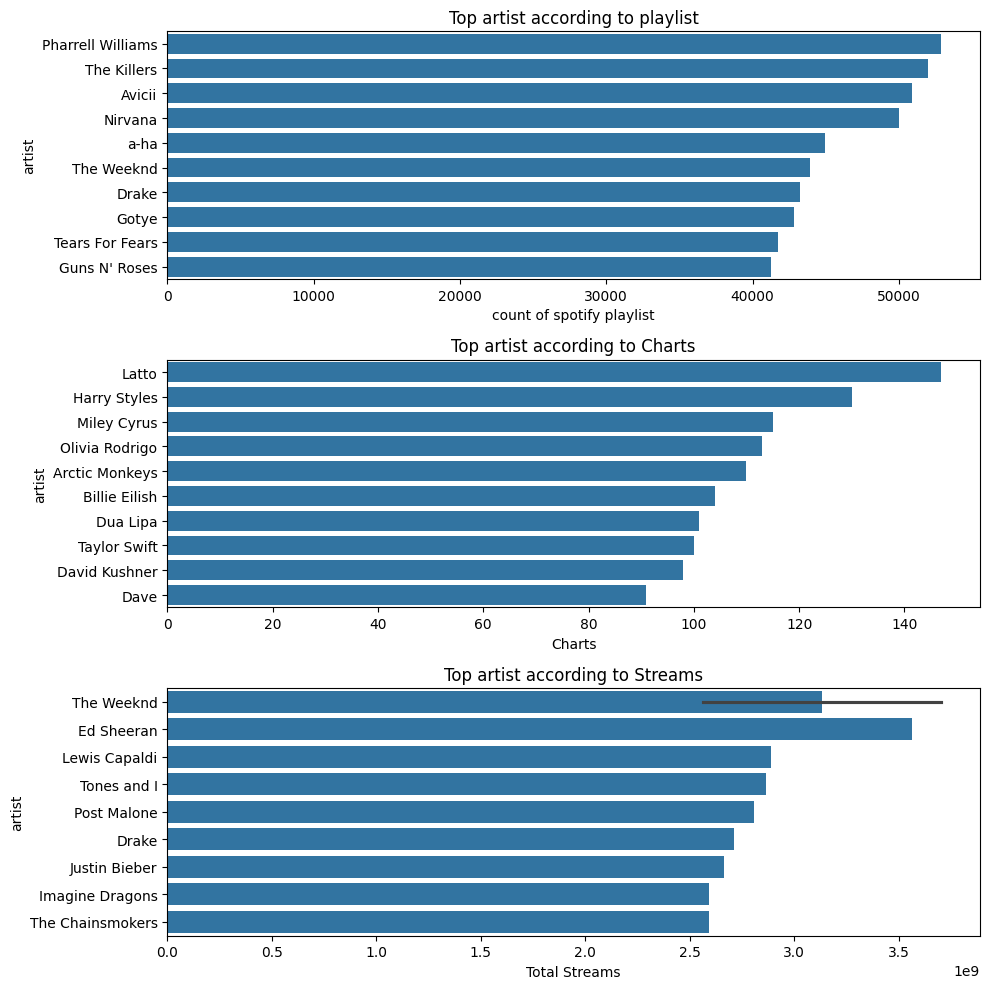

In [69]:
play = df.sort_values(by='in_spotify_playlists', ascending=False)
play = play[['artist', 'in_spotify_playlists']][:10]

chart = df.sort_values(by='in_spotify_charts', ascending=False)
chart = chart[['artist', 'in_spotify_charts']][:10]

stream = df.sort_values(by='streams', ascending=False)
stream = stream[['artist', 'streams']][:10]

fig, axes = plt.subplots(3,1,figsize=(10,10))
plt.subplot(3,1,1)
ax1 = sns.barplot(play, y='artist', x='in_spotify_playlists')
ax1.set_xlabel('count of spotify playlist')
ax1.set_title('Top artist according to playlist')

plt.subplot(3,1,2)
ax1 = sns.barplot(chart, y='artist', x='in_spotify_charts')
ax1.set_xlabel('Charts')
ax1.set_title('Top artist according to Charts')


plt.subplot(3,1,3)
ax1 = sns.barplot(stream, y='artist', x='streams')
ax1.set_xlabel('Total Streams')
ax1.set_title('Top artist according to Streams')

plt.tight_layout()
plt.show()

"Pharell Williams", "Latto" and "The Weeknd" dominated the playlist, chart and streams game respectively

## Top 10 artist by stream and their danceability, energy, valence and liveliness

- pd.melt(topten, ...)  
toptenというデータフレームを、meltメソッドで別の形に変形します。

- id_vars=['artist']  
識別子となる列を指定します。この場合は'artist'列です。この列の値は変形後も残ります。

- value_vars=['danceability_%','valence_%', 'energy_%', 'liveness_%']  
変形対象となる列を指定します。この列の値が並び替えられて1列に変形されます。

- var_name='type_of_%'  
変形後の列名を指定します。この列には元の列名(danceability_%など)が入ります。

- value_name='value'  
変形後の値を格納する列名を指定します。

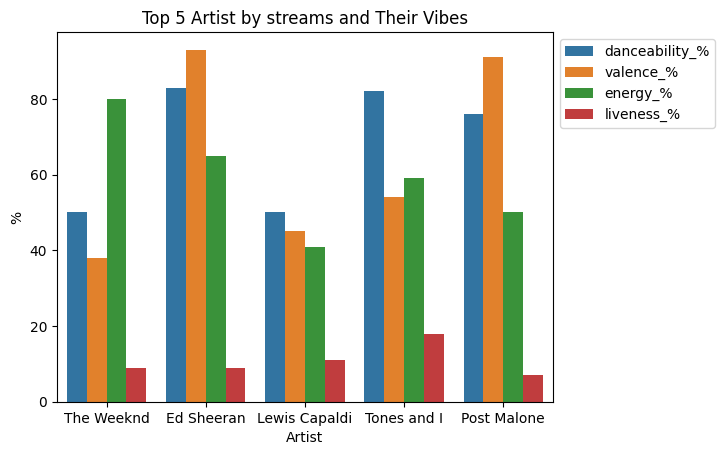

In [70]:
topten = df.sort_values(by='streams', ascending=False)
topten = topten[['artist', 'danceability_%', 'valence_%', 'energy_%', 'liveness_%', 'streams']][:5]

topten_ = pd.melt(topten,
                 id_vars=['artist'],
                 value_vars=['danceability_%','valence_%', 'energy_%', 'liveness_%'],
                 var_name='type_of_%',
                 value_name='value')

ax = sns.barplot(x='artist', y='value', hue='type_of_%', data=topten_)
ax.legend(bbox_to_anchor=(1, 1))
ax.set(xlabel='Artist', ylabel='%')
ax.set_title('Top 5 Artist by streams and Their Vibes')

plt.show()

- "Ed Sheeran" and "Post Malone" songs are more cheerful or happy than rest of the artist (according to valency)
- "Tones and I" have to compete with "Ed Sheeran" for danceability of their songs
- "The Weeknd" have the most energetic songs
- All artist's songs are low on liveness

In [71]:
topten.head(3)

,artist,danceability_%,valence_%,energy_%,liveness_%,streams
55,The Weeknd,50,38,80,9,3703895074
179,Ed Sheeran,83,93,65,9,3562543890
86,Lewis Capaldi,50,45,41,11,2887241814


In [72]:
topten_.head(3)

,artist,type_of_%,value
0,The Weeknd,danceability_%,50
1,Ed Sheeran,danceability_%,83
2,Lewis Capaldi,danceability_%,50


## Top 10 songs and their relation with danceability, valence, energy and liveness

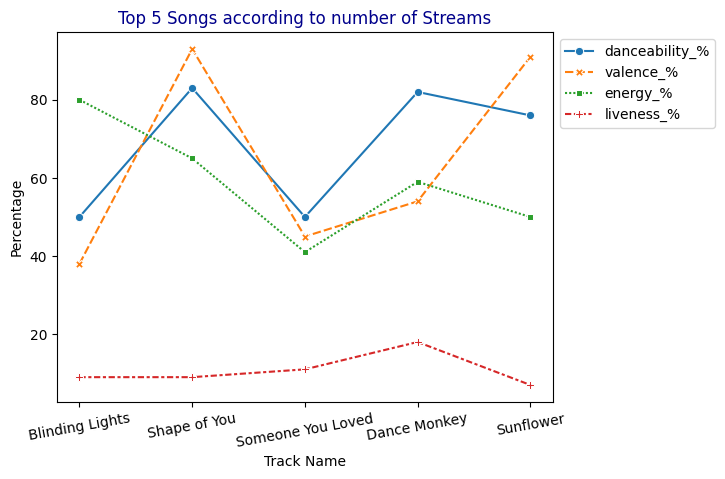

In [74]:
topten = df.sort_values(by='streams', ascending=False)
topten = topten[['track_name', 'danceability_%', 'valence_%', 'energy_%', 'liveness_%']][:5]

# 名称が長いため修正
topten = topten.replace('Sunflower - Spider-Man: Into the Spider-Verse', 'Sunflower').set_index('track_name')

ax = sns.lineplot(data=topten, markers=True)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=10)
plt.title("Top 5 Songs according to number of Streams", fontsize = 12, color = 'darkblue')
ax.set_ylabel('Percentage')
ax.set_xlabel('Track Name')

plt.show()

- "Shape of You" and "Sunflower" are more positive songs
- "Dance Monkey" and "Shape of You" are best songs to dance on
- "Blinding Lights" is the most energetic song